In [54]:
import matplotlib.pyplot as plt
import pandas as pd

from config.project_config import get_data_path

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df


# Plots
from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness

In [55]:
# sub_directory = "2025_09_01"
sub_directory = "2025_09_29_Bernard"
max_utilization  = 0.85

experiments_file_path = get_data_path(
    sub_directory,
    f"experiments_{max_utilization:.2f}".replace(".", "_")
)

schedules_file_path = get_data_path(
        sub_directory,
        f"schedules_{max_utilization:.2f}".replace(".", "_")
)

In [56]:
df_experiments = pd.read_csv(f"{experiments_file_path}.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type
0,21,0.25,1.00,0.85,0.1,1440,1,0,3,CP
1,22,0.25,0.75,0.85,0.1,1440,3,1,12,CP
2,23,0.25,0.50,0.85,0.1,1440,1,1,6,CP
3,24,0.25,0.25,0.85,0.1,1440,1,3,12,CP
4,25,0.25,0.00,0.85,0.1,1440,0,1,3,CP
5,26,0.50,1.00,0.85,0.1,1440,1,0,1,CP
6,27,0.50,0.75,0.85,0.1,1440,3,1,4,CP
7,28,0.50,0.50,0.85,0.1,1440,1,1,2,CP
8,29,0.50,0.25,0.85,0.1,1440,1,3,4,CP
9,30,0.50,0.00,0.85,0.1,1440,0,1,1,CP


In [57]:
df_schedules = pd.read_csv(f"{schedules_file_path}.csv")
df_schedules

,Job,Routing_ID,Experiment_ID,Arrival,Ready Time,Due Date,Shift,Operation,Machine,Original Duration,Start,End
0,01-08500-0000,01-07,21,0,1440,2746,1,0,M02,31,1440,1471
1,01-08500-0000,01-07,22,0,1440,2746,1,0,M02,31,1440,1471
2,01-08500-0000,01-07,23,0,1440,2746,1,0,M02,31,1440,1471
3,01-08500-0000,01-07,24,0,1440,2746,1,0,M02,31,1440,1471
4,01-08500-0000,01-07,25,0,1440,2746,1,0,M02,31,1440,1471
...,...,...,...,...,...,...,...,...,...,...,...,...
105320,01-08500-0413,01-02,36,31639,31680,32900,22,9,M04,33,32618,32651
105321,01-08500-0413,01-02,37,31639,31680,32900,22,9,M04,33,32867,32900
105322,01-08500-0413,01-02,38,31639,31680,32900,22,9,M04,33,32867,32900
105323,01-08500-0413,01-02,39,31639,31680,32900,22,9,M04,33,32867,32900


## Evaluation Dataframes

### Tardiness/Earliness (Metrics)

In [58]:
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-08500-0000,01-07,21,1,0,2746,2075,0,671,-671
1,01-08500-0001,01-06,21,1,53,2760,2216,0,544,-544
2,01-08500-0002,01-01,21,1,125,2836,2160,0,676,-676
3,01-08500-0003,01-05,21,1,174,3911,3048,0,863,-863
4,01-08500-0004,01-04,21,1,219,3628,3070,0,558,-558
...,...,...,...,...,...,...,...,...,...,...
8275,01-08500-0409,01-07,40,22,31539,33765,33765,0,0,0
8276,01-08500-0410,01-09,40,22,31589,33041,33836,795,0,795
8277,01-08500-0411,01-03,40,22,31599,33608,33608,0,0,0
8278,01-08500-0412,01-06,40,22,31620,33025,33880,855,0,855


### Start Deviation

In [59]:
df_dev = mean_start_deviation_per_shift_df(df_schedules)
df_dev.head(12)

,Experiment_ID,Shift,Deviation,Pairs
0,21,2,38.800000,15
1,21,3,55.131579,38
2,21,4,20.044776,67
3,21,5,30.990566,106
4,21,6,5.230769,52
5,21,7,38.564516,62
6,21,8,21.366337,101
7,21,9,32.300000,40
8,21,10,12.325000,80
9,21,11,80.176471,17


## Examples

In [32]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"] == 0.5) &
    (df_experiments["Inner Tardiness Ratio"] == 0.5)
]

df_experiments_filtered

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type
7,8,0.5,0.5,0.75,0.1,1440,1,1,2,CP


In [39]:
experiment_id  = 8

### Tardiness/Earliness (Metrics)

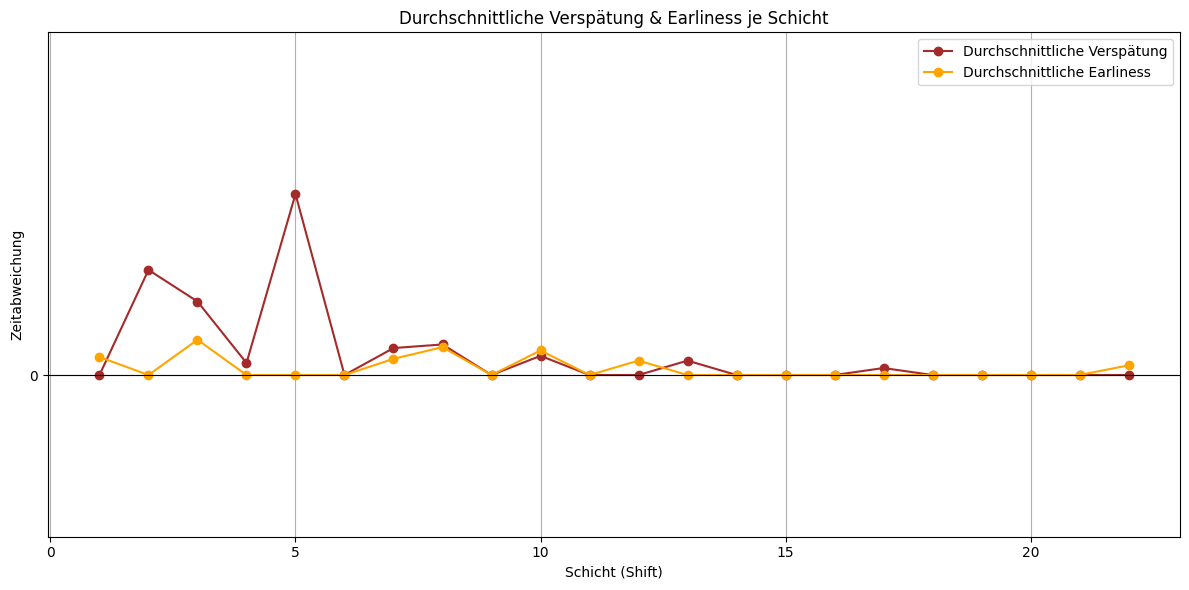

In [34]:
from src.analyses.fig_tardiness_earliness import make_fig_tardiness_earliness_only

fig = make_fig_tardiness_earliness_only(df_metrics, experiment_id=experiment_id, y_step=120, show_earliness=True)
plt.show()

### Start Deviation

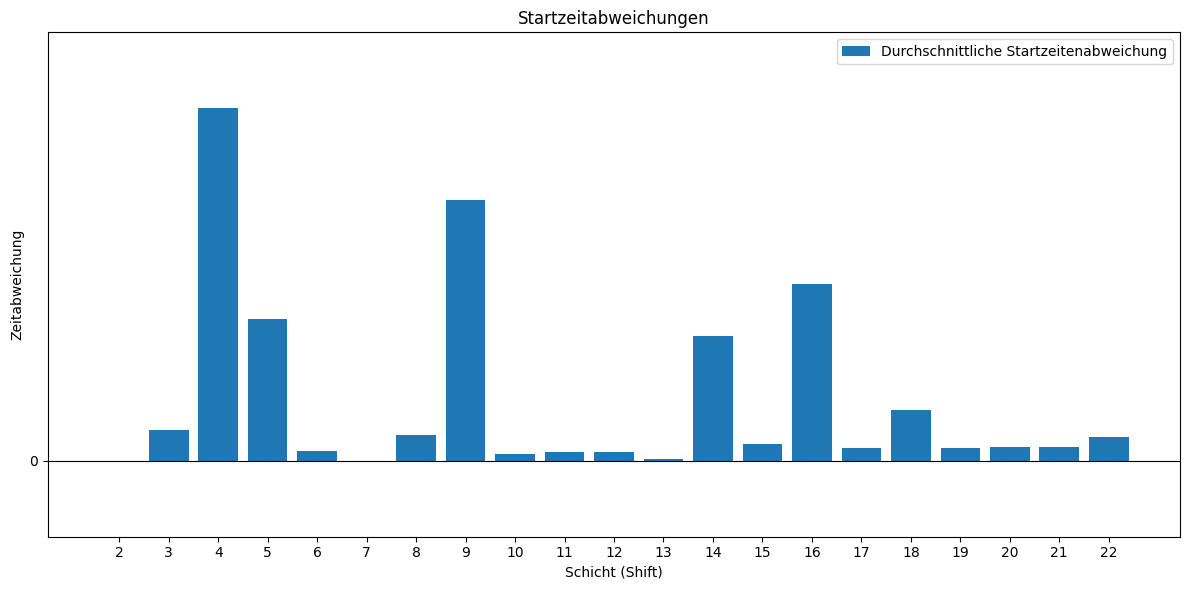

In [35]:
from src.analyses.fig_startdeviation import make_fig_startdeviation_only

fig = make_fig_startdeviation_only(df_dev, experiment_id=experiment_id, y_step=120)
plt.show()

### Vergleich

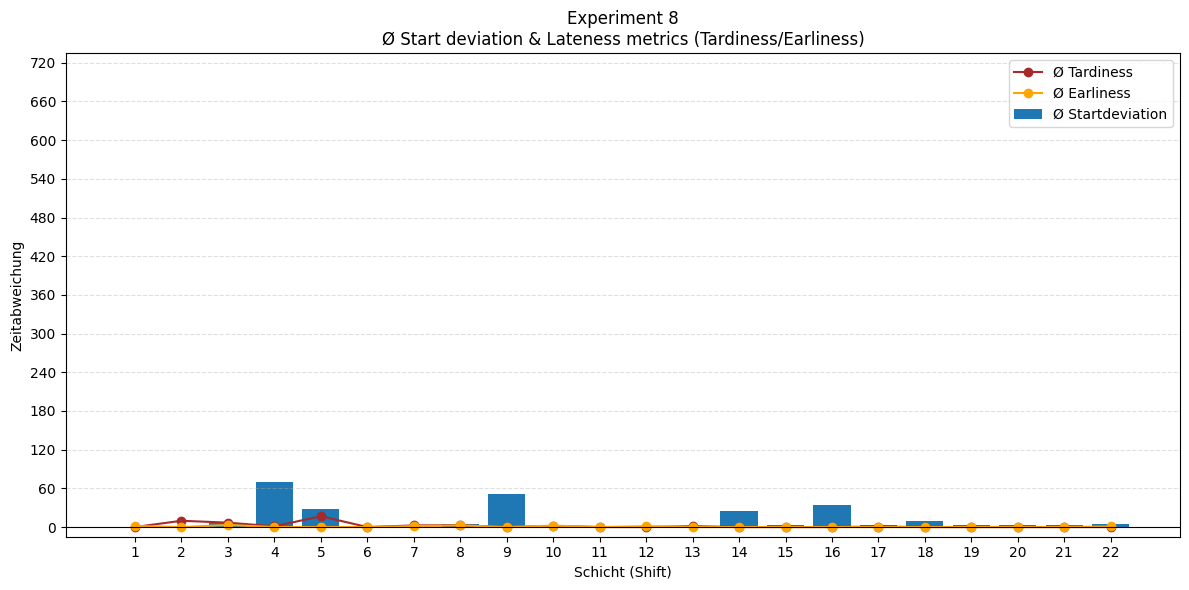

In [36]:
fig = make_combined_figure_startdeviation_tardiness_earliness(
    df_dev=df_dev,
    df_metrics=df_metrics,
    experiment_id=experiment_id,
    y_step=60,
    y_max = 720,
    title=f"Experiment {experiment_id}"
          + f"\nØ Start deviation & Lateness metrics (Tardiness/Earliness)"
)
plt.show()

In [37]:
def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

# Beispiel
print(get_experiment_string(df_experiments, 7))


Experiment 7
lateness/deviation = 0.50, tardiness/earliness = 0.75, bottleneck utilization = 0.75 (sigma = 0.10)


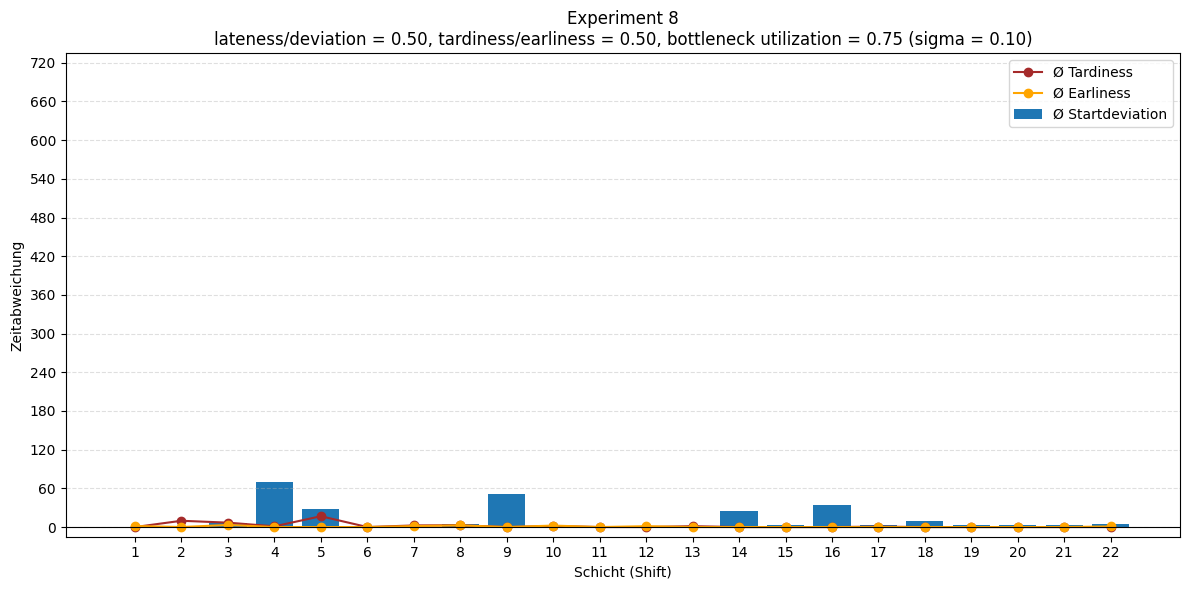

In [40]:
# experiment_id  = 22
fig = make_combined_figure_startdeviation_tardiness_earliness(
    df_dev=df_dev,
    df_metrics=df_metrics,
    experiment_id=experiment_id,
    y_step=60,
    y_max = 720,
    title=f"{get_experiment_string(df_experiments, experiment_id)}"
)
plt.show()

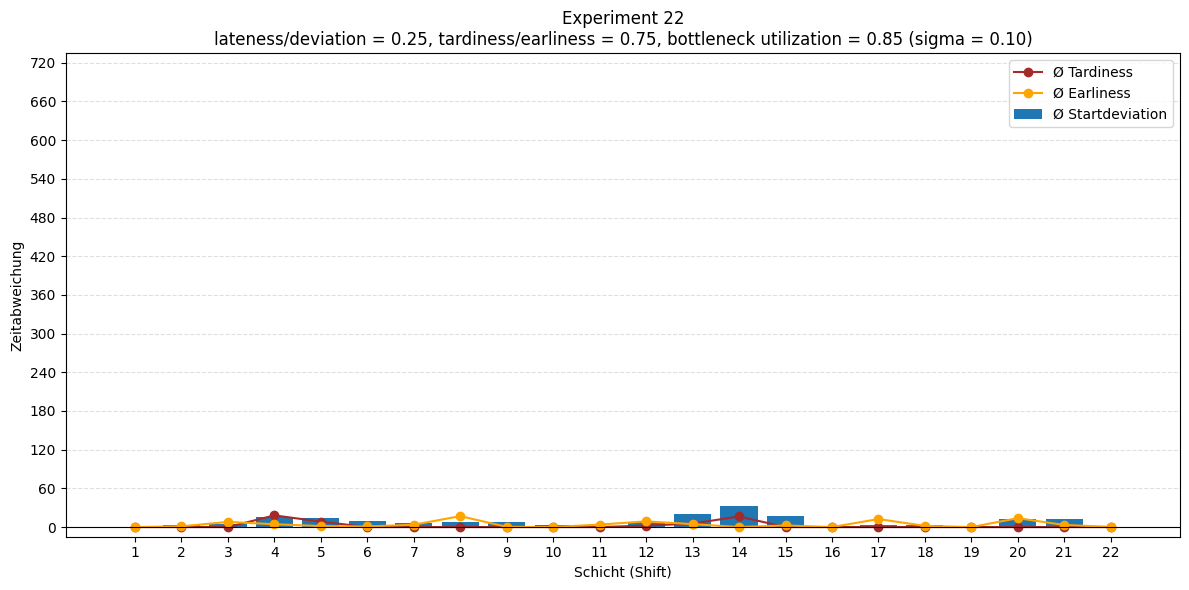

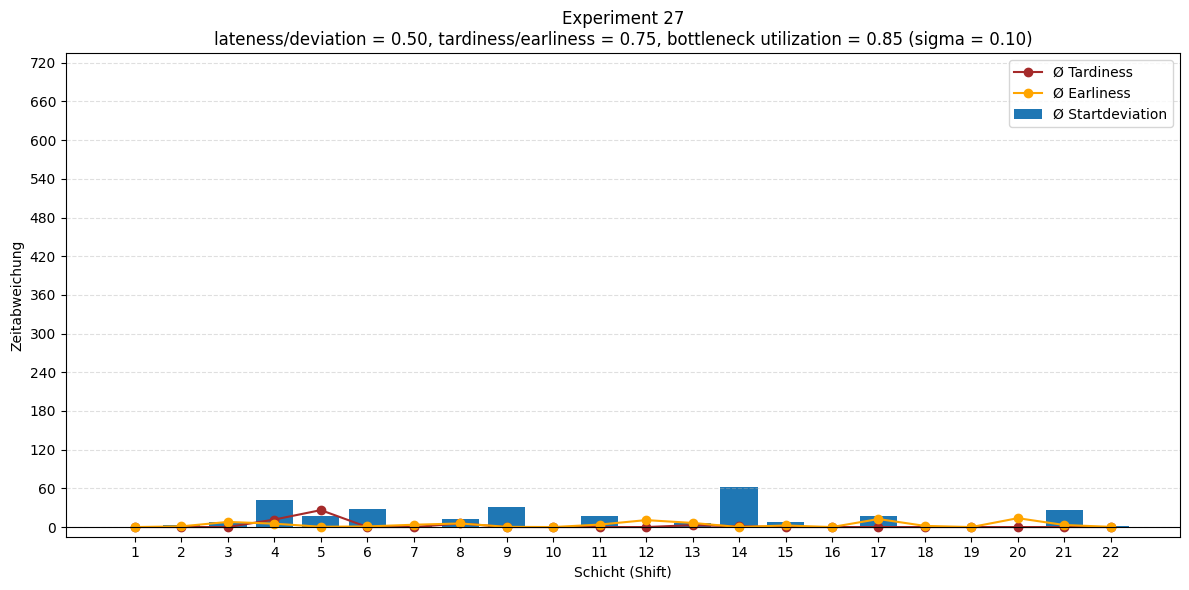

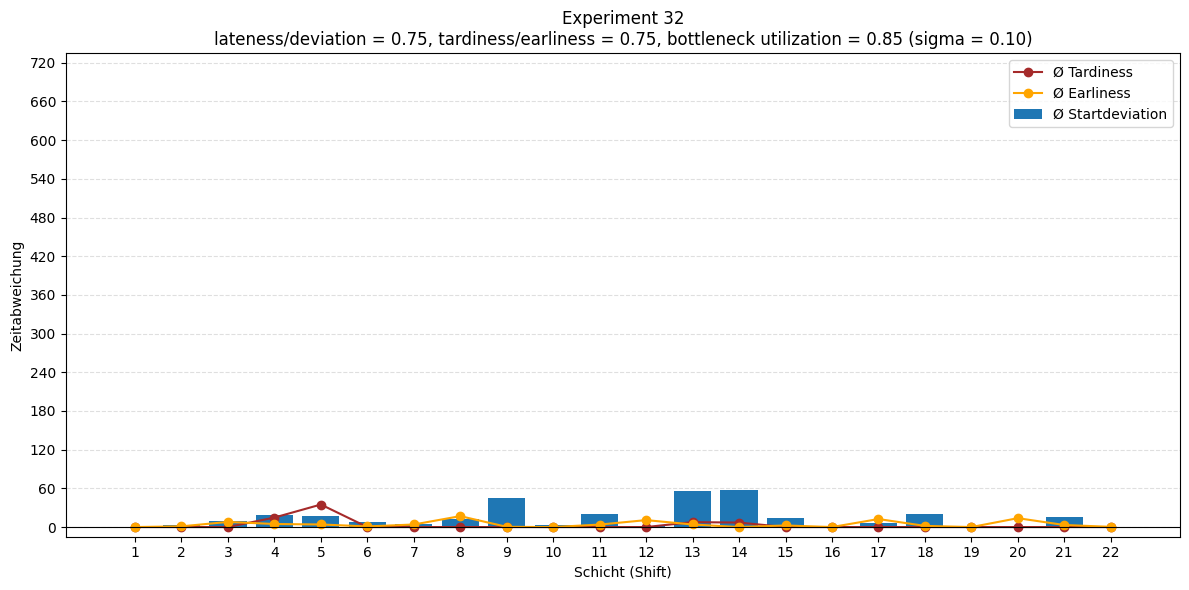

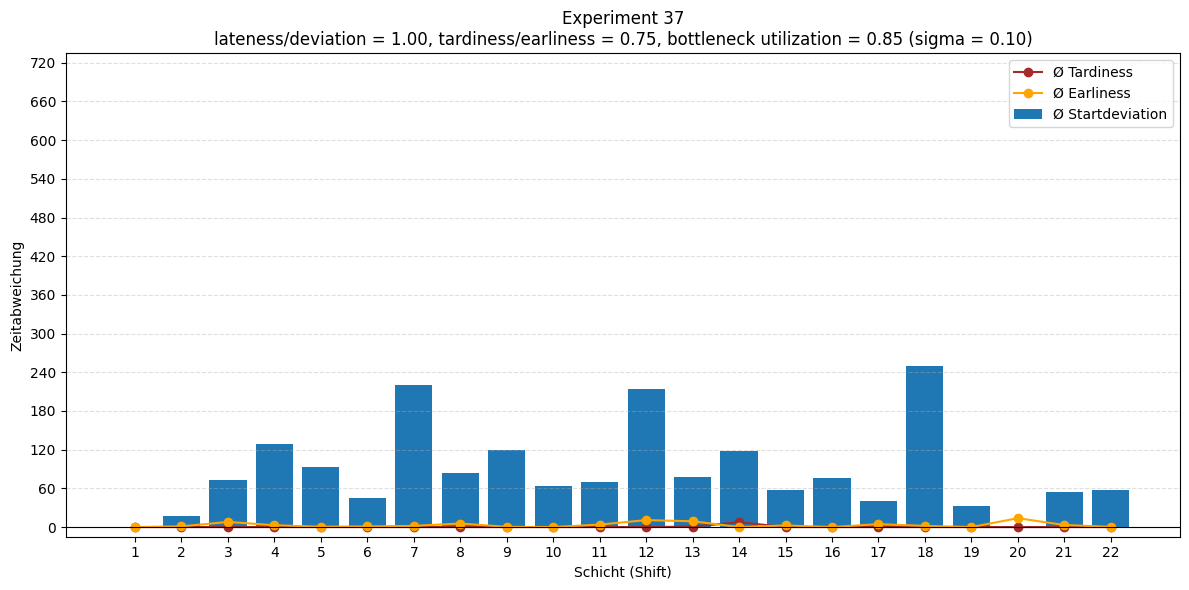

In [62]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 0.5, 0.75, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.75) &
    (df_experiments["Sim Sigma"] == 0.1)
]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()


for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max = 720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()
